In [1]:
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 200

In [3]:
directory = "/media/user1/Data 2000/soft_robotics_experiments/module_2_single_actuator_right/m2_right_actuator_simple2"
img_name = directory + "/110.jpg"

In [4]:
def showImagePlt(title, img_param):
    plt.imshow(img_param)
    plt.title(title)
    plt.show()
    
def showImageCV(title, img_param):
    cv2.imshow(title, img_param)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

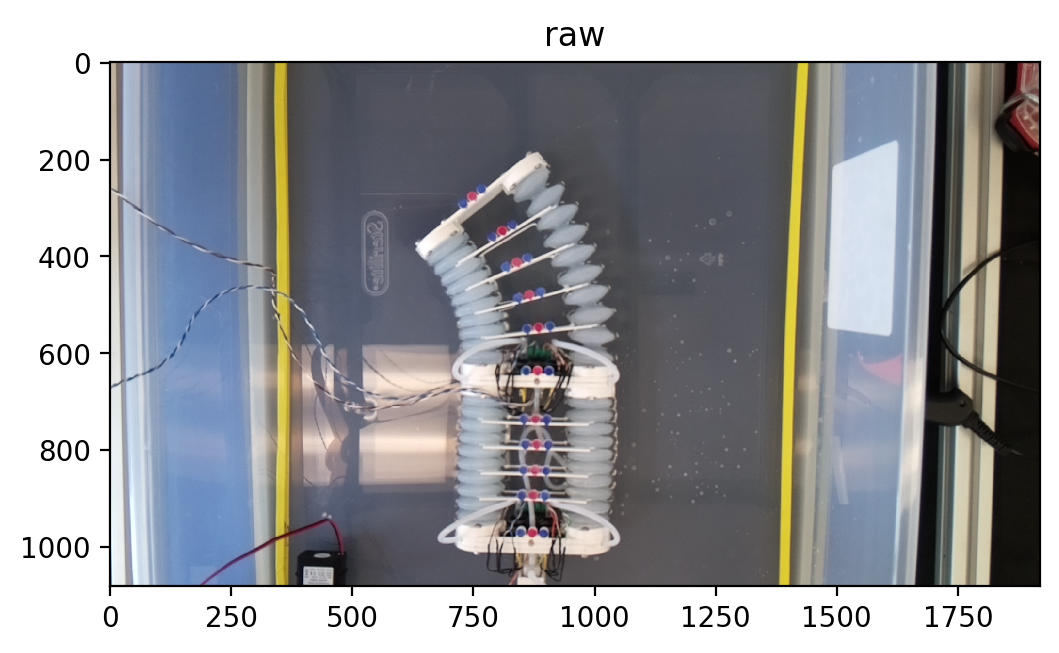

In [5]:
# Might Get an error here because cannot read from the hard-drive. Just go into folders and get to it
# It needs to wake up.
img = cv2.imread(img_name)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showImagePlt("raw", rgb_img)

In [10]:
def redMask(x, y, hmin, hmax, smin, smax, vmin, vmax):
    lower = np.array([hmin, smin, vmin])
    upper = np.array([hmax, smax, vmax])
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    print(hsv_img[y][x])
    #circle = cv2.circle(img, (x,y), radius=3, color=(0, 0, 255), thickness=-1)
    #hsv_img[y][x] = np.array([0,0,0])
    blur_img = cv2.GaussianBlur(hsv_img, (25,25), 0)
    red_mask = cv2.inRange(blur_img, lower, upper)
    red_mask = cv2.erode(red_mask, None, iterations=3)
    red_mask = cv2.dilate(red_mask, None, iterations=3)
    
    #result_img = cv2.bitwise_and(img, img, mask=red_mask)
    #showImageCV("Result Image", result_img)
    showImagePlt("Mask", red_mask)
    #showImagePlt("HSV", circle)
    
interact(redMask, x=(0,1920,1), y=(0,1080,1), hmin=(75,165,1), hmax=(255,255,1), smin=(69,125,1), smax=(255,255,1), vmin=(145,151,1), vmax=(255,255,1))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.redMask(x, y, hmin, hmax, smin, smax, vmin, vmax)>

In [7]:
def getRedMask(image):
    lower = np.array([120,97,148])
    upper = np.array([255,255,255])
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blur_img = cv2.GaussianBlur(hsv_img, (25,25), 0)
    red_mask = cv2.inRange(blur_img, lower, upper)
    red_mask = cv2.erode(red_mask, None, iterations=3)
    red_mask = cv2.dilate(red_mask, None, iterations=3)
    return red_mask

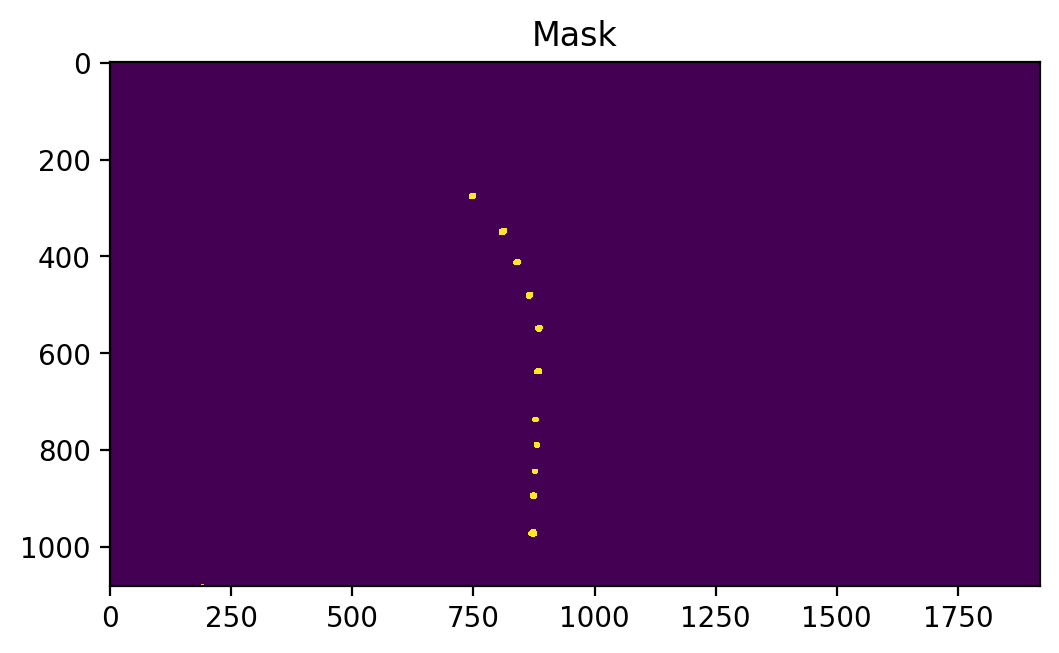

Contours Detected: 12
Here we go
enclosing: 871.5, 970.4091186523438
Here we go
enclosing: 872.7692260742188, 893.0
Here we go
enclosing: 876.0, 843.1818237304688
Here we go
enclosing: 879.5, 789.0
Here we go
enclosing: 877.0, 736.0
Here we go
enclosing: 882.0, 637.6818237304688
Here we go
enclosing: 884.2549438476562, 548.0695190429688
Here we go
enclosing: 864.5, 480.0
Here we go
enclosing: 839.5, 412.0
Here we go
enclosing: 810.0, 348.5
Here we go
enclosing: 746.5, 275.5


In [ ]:
img = cv2.imread(img_name)
red_mask = getRedMask(img)
showImagePlt("Mask", red_mask)

edged = red_mask.copy()
contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Contours Detected: " + str(len(contours)))

max_contour = max(contours, key=cv2.contourArea)
max_moments = cv2.moments(max_contour)

#print(hierarchy)
#print(contours[0])

for c in contours:
    m = cv2.moments(c)
    if m['m00'] > (max_moments['m00']/8):
        ((x,y), radius) = cv2.minEnclosingCircle(c)
        center = (int(m['m10'] / m['m00']), int(m['m01'] / m['m00']))
        #cv2.circle(img, (int(x), int(y)), int(radius), (0,255,68), 10)
        #cv2.circle(img, center, 2, (255,0,255), 10)
        print("Here we go")
        print("enclosing: " + str(x) + ", " + str(y))
        #print("moments: " + str(center))

showImageCV("Circles", img)
# rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# showImagePlt("Circles", rgb_img)

# BLUE MASK

In [ ]:
def blueMask(x, y, hmin, hmax, smin, smax, vmin, vmax):
    lower = np.array([hmin, smin, vmin])
    upper = np.array([hmax, smax, vmax])
    
    img = cv2.imread(img_name)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    print(hsv_img[y][x])
    circle = cv2.circle(img, (x,y), radius=3, color=(0, 0, 255), thickness=-1)
    #blur_img = cv2.GaussianBlur(hsv_img, (25,25), 0)
    #blue_mask = cv2.inRange(blur_img, lower, upper)
    #blue_mask = cv2.erode(blue_mask, None, iterations=3)
    #blue_mask = cv2.dilate(blue_mask, None, iterations=3)
    
    #result_img = cv2.bitwise_and(img, img, mask=red_mask)
    #showImageCV("Result Image", result_img)
    #showImagePlt("Mask", blue_mask)
    showImagePlt("HSV", circle)
    
interact(blueMask, x=(0,1920,1), y=(0,1080,1), hmin=(100,120,1), hmax=(110,130,1), smin=(105,125,1), smax=(140,150,1), vmin=(100,120,1), vmax=(120,140,1))

In [ ]:
def getBlueMask(image):
    lower = np.array([110,115,110])
    upper = np.array([120,150,130])
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    blur_img = cv2.GaussianBlur(hsv_img, (25,25), 0)
    blue_mask = cv2.inRange(blur_img, lower, upper)
    blue_mask = cv2.erode(blue_mask, None, iterations=3)
    blue_mask = cv2.dilate(blue_mask, None, iterations=3)
    return blue_mask

In [ ]:
img = cv2.imread(img_name)
blue_mask = getBlueMask(img)

edged = blue_mask.copy()
contours, hierarchy = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Contours Detected: " + str(len(contours)))

max_contour = max(contours, key=cv2.contourArea)
max_moments = cv2.moments(max_contour)

for c in contours:
    m = cv2.moments(c)
    if m['m00'] > (max_moments['m00']/8):
        ((x,y), radius) = cv2.minEnclosingCircle(c)
        center = (int(m['m10'] / m['m00']), int(m['m01'] / m['m00']))
        #cv2.circle(img, (int(x), int(y)), int(radius), (0,255,68), 10)
        cv2.circle(img, center, 2, (255,0,255), 10)

showImageCV("Circles", img)
# rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# showImagePlt("Circles", rgb_img)